Задание:

1. Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала
2. Рассчитать среднюю степень вершины фрактального графа
3. Построить распределение степеней вершин фрактального графа
4. Модифицировать исходные формулы и параметры фрактала и повторить задание с 1 по 3.

In [4]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

#1. Построение фрактального графа

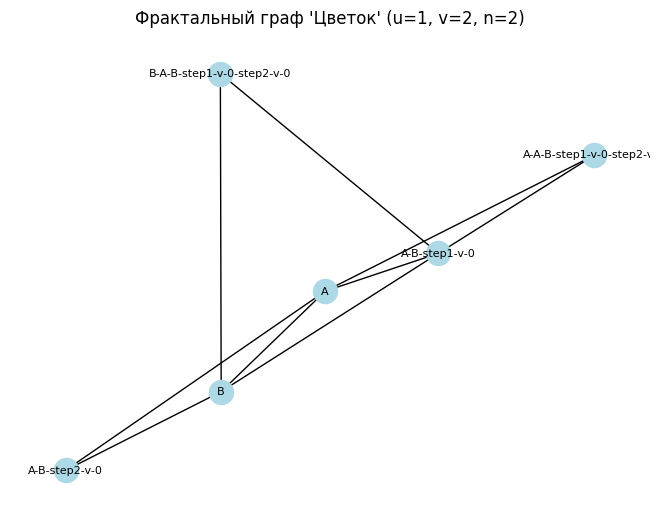

In [5]:
def construct_fractal_flower(u, v, n, visualize=True):
    """
    Строит фрактальный граф "Цветок" с параметрами u, v и n.

    Параметры:
    u (int): длина первого пути (≥ 1)
    v (int): длина второго пути (≥ 1)
    n (int): количество итераций построения (≥ 0)
    visualize (bool): если True, граф визуализируется

    Возвращает:
    networkx.Graph: фрактальный граф
    """
    if u < 1 or v < 1 or n < 0:
        raise ValueError("u и v должны быть ≥ 1, n ≥ 0")

    G = nx.Graph()
    if n == 0:
        G.add_edge(0, 1)
        if visualize:
            nx.draw(G, with_labels=True, node_color="lightblue")
            plt.title("Базовый граф (n=0)")
            plt.show()
        return G

    G.add_edge("A", "B")

    for step in range(1, n + 1):
        edges = list(G.edges())
        for (u_old, v_old) in edges:
            G.remove_edge(u_old, v_old)

            # Добавление пути длиной u
            current_nodes = [u_old]
            for i in range(u - 1):
                new_node = f"{u_old}-{v_old}-step{step}-u-{i}"
                current_nodes.append(new_node)
            current_nodes.append(v_old)
            for i in range(len(current_nodes) - 1):
                G.add_edge(current_nodes[i], current_nodes[i+1])

            # Добавление пути длиной v
            current_nodes = [u_old]
            for i in range(v - 1):
                new_node = f"{u_old}-{v_old}-step{step}-v-{i}"
                current_nodes.append(new_node)
            current_nodes.append(v_old)
            for i in range(len(current_nodes) - 1):
                G.add_edge(current_nodes[i], current_nodes[i+1])

    if visualize:
        pos = nx.spring_layout(G, seed=42)  # Фиксируем seed для стабильности визуализации
        nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8)
        plt.title(f"Фрактальный граф 'Цветок' (u={u}, v={v}, n={n})")
        plt.show()

    return G

G = construct_fractal_flower(u=1, v=2, n=2)

#Расчет средней степени вершины

In [8]:
def calculate_average_degree(G):
    degrees = [G.degree[node] for node in G.nodes]
    return sum(degrees) / len(degrees)

# Пример использования:
avg_degree = calculate_average_degree(G)
print(f"Средняя степень вершины: {avg_degree:.2f}")

Средняя степень вершины: 3.00


# Распределение степеней вершин

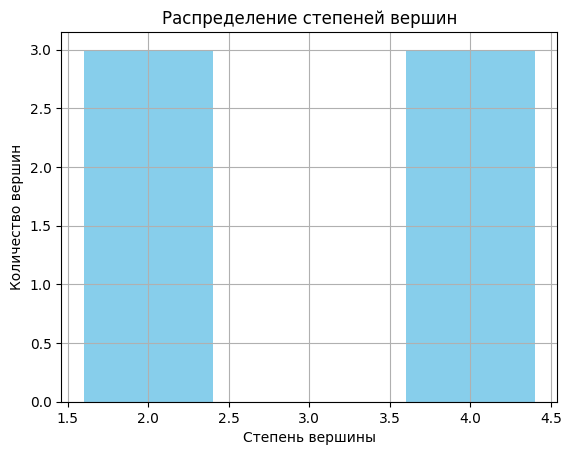

In [9]:
def plot_degree_distribution(G):
    degrees = [G.degree[node] for node in G.nodes]
    degree_count = Counter(degrees)
    degrees_sorted, counts_sorted = zip(*sorted(degree_count.items()))

    plt.bar(degrees_sorted, counts_sorted, color="skyblue")
    plt.xlabel("Степень вершины")
    plt.ylabel("Количество вершин")
    plt.title("Распределение степеней вершин")
    plt.grid(True)
    plt.show()

# Пример использования:
plot_degree_distribution(G)

#Модификация фрактала

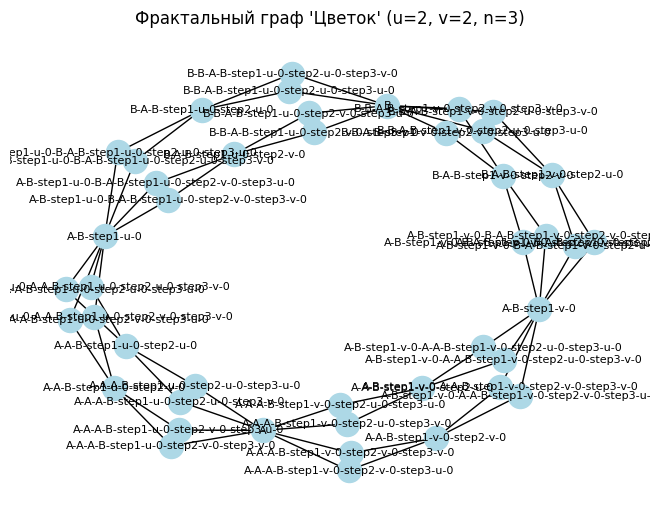

Средняя степень вершины (новый граф): 2.91


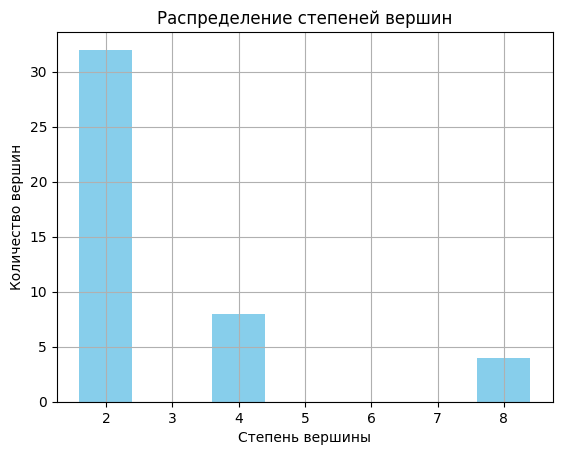

In [12]:
# Модифицируем параметры
u_new, v_new, n_new = 2, 2, 3

# Построение нового графа
G_new = construct_fractal_flower(u=u_new, v=v_new, n=n_new)

# Расчет средней степени вершины
avg_degree_new = calculate_average_degree(G_new)
print(f"Средняя степень вершины (новый граф): {avg_degree_new:.2f}")

# Построение распределения степеней вершин
plot_degree_distribution(G_new)